# EU Press Word Counting

## Import data

In [34]:
import pandas as pd
df = pd.read_csv("../data/raw/eu_press_releases_ghg.csv")
df.head()

,date,text
0,May_26_2025,Daily News 26 / 05 / 2025\nEU organises firefi...
1,May_20_2025,Commission approves €1.2 billion Dutch State a...
2,Apr_11_2025,Landmark agreement towards achieving net-zero ...
3,Feb_26_2025,Questions and answers on the Clean Industrial ...
4,Jan_10_2025,Daily News 10 / 01 / 2025\nCommission disburse...


## Preprocessing
- Convert date into datetime
- Tokenization of text

In [35]:
# Convert date into datetime
df["date"] = pd.to_datetime(df["date"], format='%b_%d_%Y')
print(df["date"].dtypes)
df["year"] = df["date"].dt.year
df.head()

datetime64[ns]


,date,text,year
0,2025-05-26,Daily News 26 / 05 / 2025\nEU organises firefi...,2025
1,2025-05-20,Commission approves €1.2 billion Dutch State a...,2025
2,2025-04-11,Landmark agreement towards achieving net-zero ...,2025
3,2025-02-26,Questions and answers on the Clean Industrial ...,2025
4,2025-01-10,Daily News 10 / 01 / 2025\nCommission disburse...,2025


In [36]:
# Tokenization of text

# Be careful of installation of Spacy. We need to add Spacy and its model "en_core_web_sm",
# which cannot be simply installed by "uv sync".
# Please follow these commands to install:
# uv sync # install spacy and pip
# uv run spacy download en_core_web_sm

import spacy
nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()
tokenizer = spacy.tokenizer.Tokenizer(nlp.vocab)

df["doc"] = df["text"].apply(tokenizer)
df["tokens"] = df["doc"].apply(lambda x: [t.text.lower() for t in x])

df.head()

,date,text,year,doc,tokens
0,2025-05-26,Daily News 26 / 05 / 2025\nEU organises firefi...,2025,"(Daily, News, 26, /, 05, /, 2025, \n, EU, orga...","[daily, news, 26, /, 05, /, 2025, \n, eu, orga..."
1,2025-05-20,Commission approves €1.2 billion Dutch State a...,2025,"(Commission, approves, €1.2, billion, Dutch, S...","[commission, approves, €1.2, billion, dutch, s..."
2,2025-04-11,Landmark agreement towards achieving net-zero ...,2025,"(Landmark, agreement, towards, achieving, net-...","[landmark, agreement, towards, achieving, net-..."
3,2025-02-26,Questions and answers on the Clean Industrial ...,2025,"(Questions, and, answers, on, the, Clean, Indu...","[questions, and, answers, on, the, clean, indu..."
4,2025-01-10,Daily News 10 / 01 / 2025\nCommission disburse...,2025,"(Daily, News, 10, /, 01, /, 2025, \n, Commissi...","[daily, news, 10, /, 01, /, 2025, \n, commissi..."


## Count climate change related words

In [37]:
# Generate bag-of-words
import collections

df["token_counts"] = df["tokens"].apply(collections.Counter)

df.head()

,date,text,year,doc,tokens,token_counts
0,2025-05-26,Daily News 26 / 05 / 2025\nEU organises firefi...,2025,"(Daily, News, 26, /, 05, /, 2025, \n, EU, orga...","[daily, news, 26, /, 05, /, 2025, \n, eu, orga...","{'daily': 2, 'news': 2, '26': 2, '/': 4, '05':..."
1,2025-05-20,Commission approves €1.2 billion Dutch State a...,2025,"(Commission, approves, €1.2, billion, Dutch, S...","[commission, approves, €1.2, billion, dutch, s...","{'commission': 7, 'approves': 1, '€1.2': 2, 'b..."
2,2025-04-11,Landmark agreement towards achieving net-zero ...,2025,"(Landmark, agreement, towards, achieving, net-...","[landmark, agreement, towards, achieving, net-...","{'landmark': 3, 'agreement': 12, 'towards': 5,..."
3,2025-02-26,Questions and answers on the Clean Industrial ...,2025,"(Questions, and, answers, on, the, Clean, Indu...","[questions, and, answers, on, the, clean, indu...","{'questions': 3, 'and': 77, 'answers': 3, 'on'..."
4,2025-01-10,Daily News 10 / 01 / 2025\nCommission disburse...,2025,"(Daily, News, 10, /, 01, /, 2025, \n, Commissi...","[daily, news, 10, /, 01, /, 2025, \n, commissi...","{'daily': 2, 'news': 2, '10': 3, '/': 4, '01':..."


In [38]:
# Count and store counts

# Original: Greenhouse Gas, GHG, Net-zero, Carbon neutral. Simplify to search for one word for each
words_list = ["Greenhouse", "GHG", "Net-zero", "Carbon"]
words_list = list(map(lambda x: x.lower(), words_list))

# Count words
for word in words_list:
    df[word] = df["token_counts"].apply(lambda x: x[word])

df.head()

,date,text,year,doc,tokens,token_counts,greenhouse,ghg,net-zero,carbon
0,2025-05-26,Daily News 26 / 05 / 2025\nEU organises firefi...,2025,"(Daily, News, 26, /, 05, /, 2025, \n, EU, orga...","[daily, news, 26, /, 05, /, 2025, \n, eu, orga...","{'daily': 2, 'news': 2, '26': 2, '/': 4, '05':...",0,0,0,1
1,2025-05-20,Commission approves €1.2 billion Dutch State a...,2025,"(Commission, approves, €1.2, billion, Dutch, S...","[commission, approves, €1.2, billion, dutch, s...","{'commission': 7, 'approves': 1, '€1.2': 2, 'b...",2,1,0,0
2,2025-04-11,Landmark agreement towards achieving net-zero ...,2025,"(Landmark, agreement, towards, achieving, net-...","[landmark, agreement, towards, achieving, net-...","{'landmark': 3, 'agreement': 12, 'towards': 5,...",2,3,6,2
3,2025-02-26,Questions and answers on the Clean Industrial ...,2025,"(Questions, and, answers, on, the, Clean, Indu...","[questions, and, answers, on, the, clean, indu...","{'questions': 3, 'and': 77, 'answers': 3, 'on'...",1,0,0,4
4,2025-01-10,Daily News 10 / 01 / 2025\nCommission disburse...,2025,"(Daily, News, 10, /, 01, /, 2025, \n, Commissi...","[daily, news, 10, /, 01, /, 2025, \n, commissi...","{'daily': 2, 'news': 2, '10': 3, '/': 4, '01':...",1,1,0,0


In [49]:
# Pivot the df for visualization
df_viz = df[["year"] + words_list].copy()
df_viz = df_viz.groupby("year").sum()
df_viz = df_viz.stack().reset_index()
df_viz.columns = ["year", "word", "count"]
df_viz.head()

,year,word,count
0,2024,greenhouse,33
1,2024,ghg,16
2,2024,net-zero,7
3,2024,carbon,35
4,2025,greenhouse,6


## Visualize the counts

<Axes: xlabel='year', ylabel='count'>

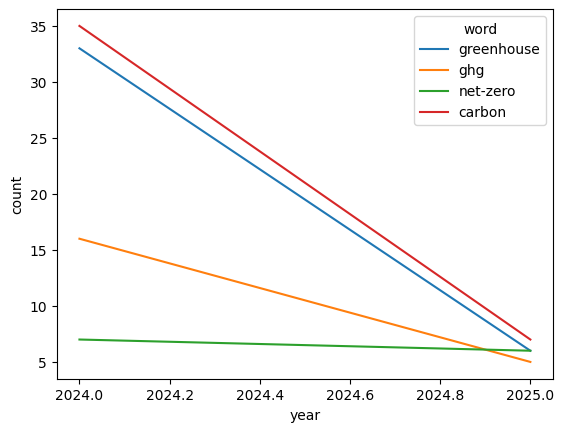

In [50]:
import seaborn as sns
sns.lineplot(x='year', y='count', hue='word', data=df_viz)